In [18]:
#libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#reading in dataset
df_diabetes = pd.read_csv("health care diabetes.csv")

In [3]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Exploration

In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dataset does not contain any missing values, but a value of zero in columns such as glucose, blood pressure,
skin thickness, Insulin and BMI would not make sense

In [5]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Visually explore these variables using histograms and treat missing values

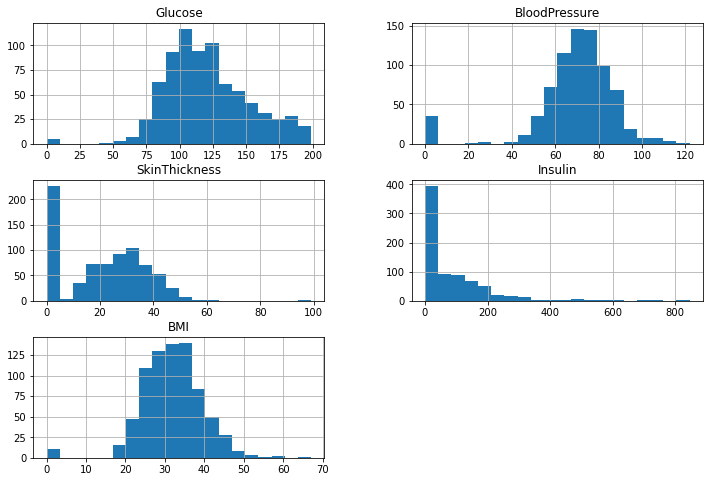

In [6]:
cols=df_diabetes.columns[1:-3]
df_diabetes[cols].hist(figsize=(12, 8), bins=20)
plt.show()

In [7]:
# viewing number of NAs:
df_diabetes[cols]=df_diabetes[cols].replace(0,np.NaN)
df_diabetes.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
# percent of NAs in column:

(df_diabetes.isna().sum()/df_diabetes.shape[0])*100


Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

handling NAs:

based on the relatively normal distribution, I will replace the NAs with the following:

Glucose- normal distribution with only five NAs - replace with average 

BloodPressure- replace with average 

Skin Thickness- High number of NAs, 30 percent. I will replace these with the mean

Insulin- High Number of NAs (48 percent), Right Skewed, meaning that mean > median due to outliers. I shall replace NAs with the median instead of the mean

BMI- averages

In [9]:
for column in cols:
    if column=="Insulin":
        df_diabetes[column]=df_diabetes[column].replace(np.NaN,df_diabetes[column].median())
    else:
         df_diabetes[column]=df_diabetes[column].replace(np.NaN,df_diabetes[column].mean())

In [10]:
df_diabetes.info() #no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [11]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


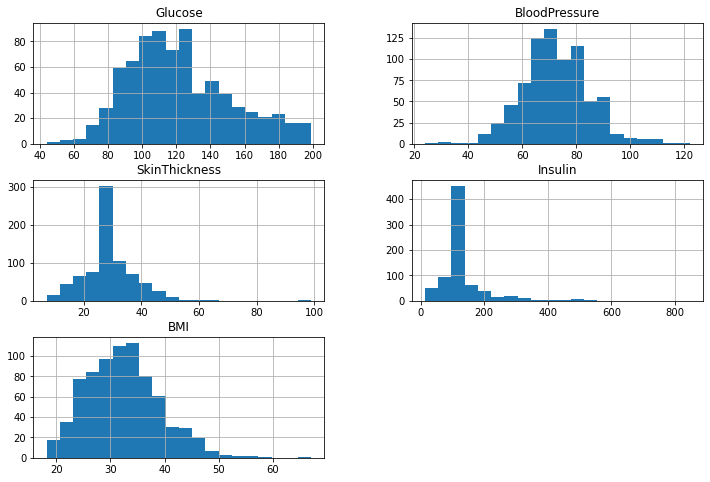

In [12]:
df_diabetes[cols].hist(figsize=(12, 8), bins=20)
plt.show()

As we can see, the Insulin column is still not very normally distributed. I will apply a log transformation to make it
more normally distributed.

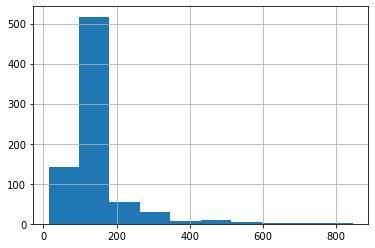

In [13]:
df_diabetes["Insulin"].hist()
plt.show()

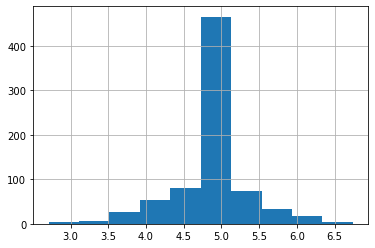

In [14]:
df_diabetes["Insulin"].apply(np.log1p)
df_diabetes["Insulin"]=df_diabetes["Insulin"].apply(np.log1p)
df_diabetes["Insulin"].hist()
plt.show()# normal distribution

#### 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

 

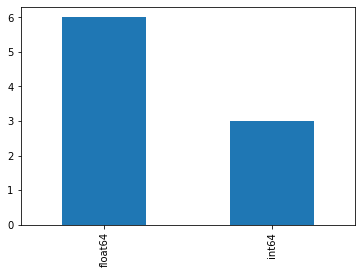

In [15]:
df_diabetes.dtypes.value_counts().plot(kind="bar")
plt.show()

#### 4.Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.



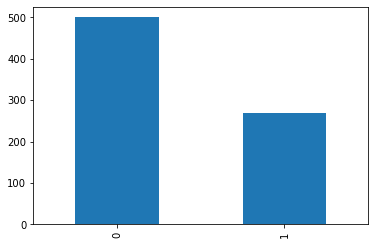

In [16]:
#outcomes in this case is their diabetic status
df_diabetes["Outcome"].value_counts().plot(kind="bar")
plt.show()

In [17]:
df_diabetes["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Observations:
As we can see, we have an imbalanced dataset with the number of non-diabetic patients being significantly higher than diabetic patient records. This could lead to issues when training models on this dataset since the resulting models would favor the non-diabetic outcome over the minority diabetes-positive records when predicting outcomes.

#### Next Steps

In order to deal with the imbalanced dataset, I will select models that are more robust/less sensitive to class imbalances, such as decision trees and random forests, as well as ensemble methods designed for imbalanced data like EasyEnsemble or BalancedRandomForest, stacking and boosting to combine the predictions from multiple models, potentially improving classification for the minority class.

Regarding evaluation metrics, I will ensure that I don't soley rely on accuracy since this could be misleading due to the imbalanced nature of the dataset.

Instead, I will focus on metrics like precision, recall, F1-score, and area under the Receiver Operating Characteristic (ROC-AUC) curve. These metrics provide a more comprehensive view of model performance.

Cross-Validation: When performing model evaluation, I will use techniques like stratified k-fold cross-validation to ensure that each fold has a balanced representation of both classes.

Regarding Hyperparameter Tuning, I will consider tuning model hyperparameters specifically for the imbalanced dataset. For example, I could adjust class weights or other parameters that affect class balancing.


#### Create scatter charts between the pair of variables to understand the relationships. Describe your findings.



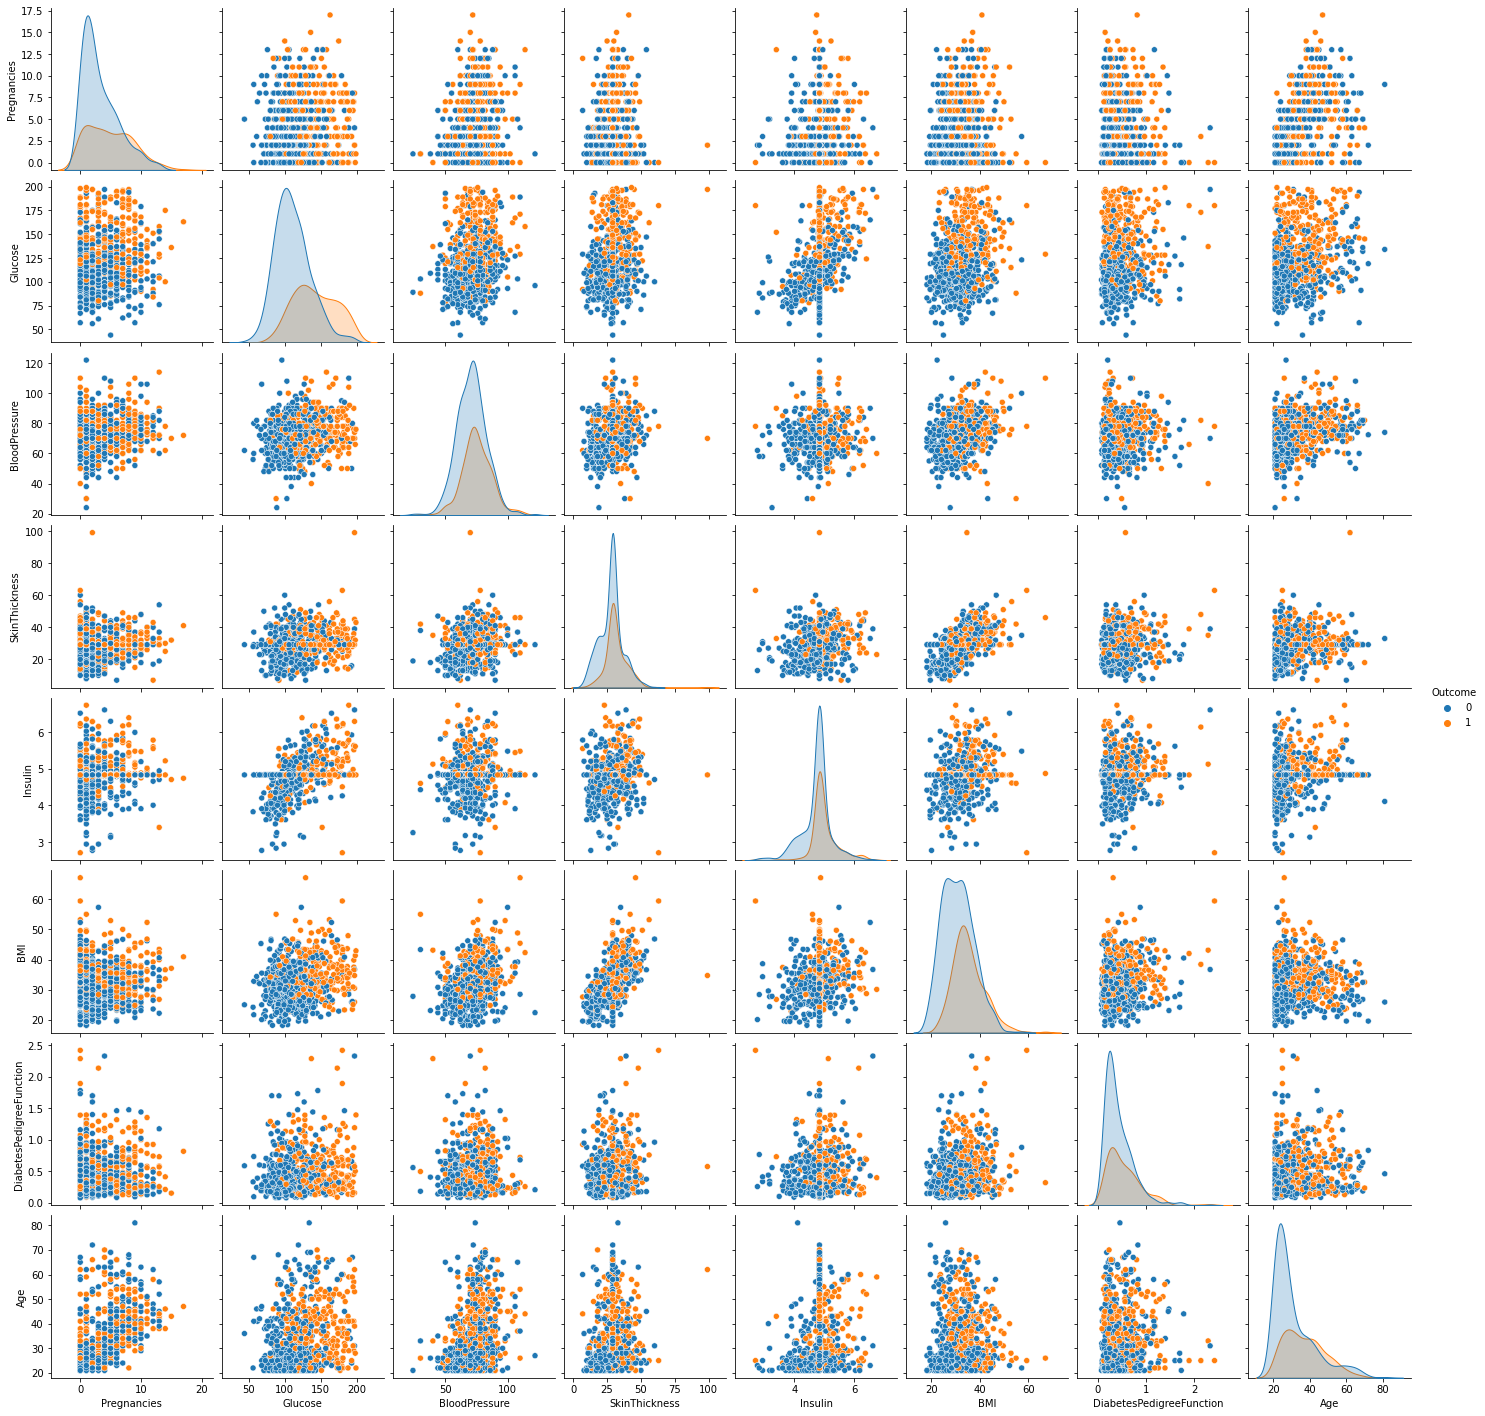

In [28]:
sns.pairplot(df_diabetes, hue="Outcome")
plt.show()

#### Observation

We can see particularly distinct clusters between diabetes status(Outcome) in the graphs:

Glucose Row - most other columns plotted against glucose show distinct clusters, meaning that Glucose is an important column to include in the model

Blood pressure vs Insulin, Insulin vs Age, Insulin vs Blood Pressure, Glucose vs Blood Pressure, Glucose vs SkinThickness, Glucose vs BMI, Glucose vs Insulin, Age vs BloodPressure, have particularly clear clusters.




#### Perform correlation analysis. Visually explore it using a heat map.

In [29]:
df_diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.089855,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.443508,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.093501,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.173630,0.542398,0.100966,0.127872,0.215299
Insulin,0.089855,0.443508,0.093501,0.173630,1.000000,0.186120,0.081285,0.162047,0.248705
BMI,0.021565,0.230941,0.281268,0.542398,0.186120,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.081285,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.162047,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.248705,0.311924,0.173844,0.238356,1.000000


Notes: Glucose, BMI, Insulin,Age...

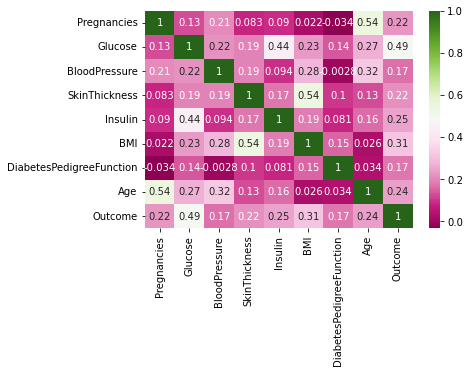

In [41]:
sns.heatmap(df_diabetes.corr(),cmap='PiYG',annot=True)
plt.show()

As stated before, we can see that Glucose in particular is highly correlated with Outcome, followed by BMI, Insulin, skin thickness

## Project Task: Week 2

Data Modeling:

#### 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

As mentioned earlier, in order to deal with the imbalanced dataset, I will select models that are more robust/less sensitive to class imbalances, such as decision trees and random forests, as well as ensemble methods designed for imbalanced data like EasyEnsemble or BalancedRandomForest, stacking and boosting to combine the predictions from multiple models, potentially improving classification for the minority class.

Regarding evaluation metrics, I will ensure that I don't soley rely on accuracy since this could be misleading due to the imbalanced nature of the dataset.

Instead, I will focus on metrics like precision, recall, F1-score, and area under the Receiver Operating Characteristic (ROC-AUC) curve. These metrics provide a more comprehensive view of model performance.

Cross-Validation: When performing model evaluation, I will use techniques like stratified k-fold cross-validation to ensure that each fold has a balanced representation of both classes.

Regarding Hyperparameter Tuning, I will consider tuning model hyperparameters specifically for the imbalanced dataset. For example, I could adjust class weights or other parameters that affect class balancing.


#### 2. Apply an appropriate classification algorithm to build a model.